In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [46]:
def get_hp(torque, rpm):
    return torque * rpm / 9549 * 1.36

def rpm_to_torque(rpm, max_torque, max_torque_rpm, factor=1):
    diff_rpm_abs = abs(max_torque_rpm - rpm)
    
    if rpm < max_torque_rpm:
        return max_torque * (1 - diff_rpm_abs / max_torque_rpm * factor)
    else:
        return max_torque * (1 - diff_rpm_abs / max_torque_rpm)

In [47]:
# 300; 6000; 256;
# 400; 4000; 227

In [48]:
rpm_list = [i for i in range(1000, 7500, 500)]

In [49]:
torque_list_1 = list(map(lambda i: rpm_to_torque(i, 300, 6000), rpm_list))
hp_list_1 = list(map(lambda i: get_hp(i[0], i[1]), zip(torque_list_1, rpm_list)))

torque_list_2 = list(map(lambda i: rpm_to_torque(i, 400, 4000, .1), rpm_list))
hp_list_2 = list(map(lambda i: get_hp(i[0], i[1]), zip(torque_list_2, rpm_list)))

In [69]:
l = len(rpm_list)
df = pd.DataFrame(dict(rpm_list=rpm_list * 4, 
                       signal=torque_list_1 +  hp_list_1 + torque_list_2 + hp_list_2, 
                       car=[1] * l * 2 + [2] * l * 2,
                       signal_type=['torque'] * l + ['hp'] * l + ['torque'] * l +['hp'] * l))
print(df)

    rpm_list      signal  car signal_type
0       1000   50.000000    1      torque
1       1500   75.000000    1      torque
2       2000  100.000000    1      torque
3       2500  125.000000    1      torque
4       3000  150.000000    1      torque
5       3500  175.000000    1      torque
6       4000  200.000000    1      torque
7       4500  225.000000    1      torque
8       5000  250.000000    1      torque
9       5500  275.000000    1      torque
10      6000  300.000000    1      torque
11      6500  275.000000    1      torque
12      7000  250.000000    1      torque
13      1000    7.121165    1          hp
14      1500   16.022620    1          hp
15      2000   28.484658    1          hp
16      2500   44.507278    1          hp
17      3000   64.090481    1          hp
18      3500   87.234265    1          hp
19      4000  113.938632    1          hp
20      4500  144.203582    1          hp
21      5000  178.029113    1          hp
22      5500  215.415227    1     

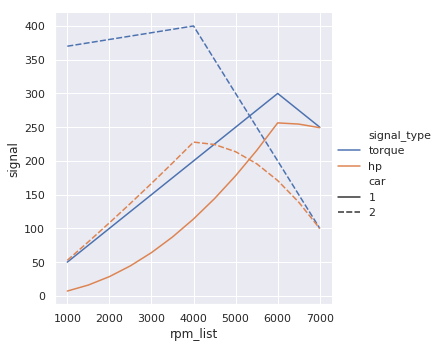

In [70]:
sns.relplot(x="rpm_list", y="signal", hue="signal_type", style="car", kind="line", data=df);

In [71]:
from scipy.interpolate import interp1d

In [73]:
x, y1 = rpm_list, hp_list_1
hp1_f = interp1d(x, y1, kind='cubic')
y2 = hp_list_2
hp2_f = interp1d(x, y2, kind='cubic')

In [74]:
rpm_list_2 = [i for i in range(1000, 7100, 100)]

In [89]:
l2 = len(rpm_list_2)
df2 = pd.DataFrame(dict(rpm_list_2=rpm_list_2 * 2, 
                        signal=[hp1_f(i).tolist() for i in rpm_list_2] + [hp2_f(i).tolist() for i in rpm_list_2], 
                        car=[1] * l2 + [2] * l2))
df2.head()

,rpm_list_2,signal,car
0,1000,7.121165,1
1,1100,8.616523,1
2,1200,10.254362,1
3,1300,12.034668,1
4,1400,13.957425,1


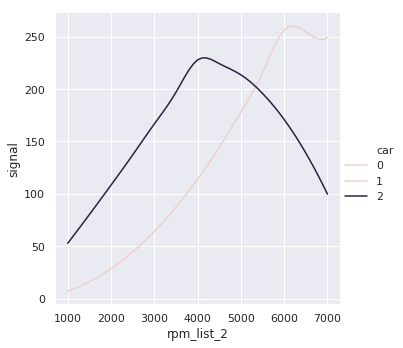

In [90]:
sns.relplot(x="rpm_list_2", y="signal", hue="car", kind="line", data=df2);

In [91]:
import scipy.integrate as integrate

In [92]:
result1 = integrate.quad(hp1_f, 1000, 7000)
result2 = integrate.quad(hp2_f, 1000, 7000)

In [94]:
print('result1: ' + str(result1[0]))
print('result2: ' + str(result2[0]))

result1: 765210.4382624982
result2: 971200.9414247747
